In [2]:
import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.stats import spearmanr
from string import ascii_uppercase

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor='white')

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.3 pynndescent==0.5.11


## Ovarian
346     hsa-miR-141
347    hsa-miR-200a
348    hsa-miR-200b
349    hsa-miR-135b
350    hsa-miR-200c
351      hsa-miR-98
352    hsa-miR-1277
353    hsa-miR-520c
354    hsa-miR-130a
355     hsa-miR-708

In [ ]:
out_dir = "./ovarian_data/"
cancer = "Ovarian"

In [11]:
#读取未处理的原始空转表达数据，里面包含大部分靶基因
adata = sc.read_visium(
    path='./Spatial Cancer/Ovarian/',
    library_id="Ovarian",
    count_file='Visium_FFPE_Human_Ovarian_Cancer_filtered_feature_bc_matrix.h5')
adata.obs_names_make_unique()
adata.var_names_make_unique()

def ProcessST(adata,min_counts,max_counts):
    # 进行基因计数和添加到 adata.obs 中
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    
    sc.pp.filter_cells(adata, min_counts=min_counts)
    sc.pp.filter_cells(adata, max_counts=max_counts)
    print(f"#cells after MT filter: {adata.n_obs}")
    sc.pp.filter_genes(adata, min_cells=10)
    
   #标准化
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    #归一化
    sc.pp.scale(adata,max_value=10)
    st_mrna = adata.to_df()
    return st_mrna

reading Spatial Cancer\Ovarian\Visium_FFPE_Human_Ovarian_Cancer_filtered_feature_bc_matrix.h5
 (0:00:00)


In [12]:
st_mrna = ProcessST(adata,2000,80000)
st_mirna = sp_mirna.to_df()

filtered out 2 cells that have less than 2000 counts
filtered out 10 cells that have more than 80000 counts
#cells after MT filter: 3443
filtered out 2513 genes that are detected in less than 10 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [17]:
def plot_heatmap(cor_df,mirna):
    # 计算斯皮尔曼相关性系数和p值
    correlation_matrix, p_values = spearmanr(cor_df)
    last_row = correlation_matrix[-1, :-1]
    last_p = p_values[-1,:-1].reshape(1,-1)
    plt.figure(figsize=(20,3),dpi=300)

    # 设置热图
    heatmap = sns.heatmap(
        last_row.reshape(1, -1),
        annot=True, 
        cmap='RdBu_r',   
        fmt=".2f", vmin=-1, vmax=1,
        linewidths=2,cbar_kws={"shrink": .8}, square=True
    )

    # 在热图上显示p值的星号标记
    for i in range(last_p.shape[0]):
        for j in range(last_p.shape[1]):
            if last_p[i, j] < 0.001:
                plt.text(j + 0.5, i + 0.5, '***', ha='center', va='bottom', color='black', fontsize=12)
            elif last_p[i, j] < 0.005:
                plt.text(j + 0.5, i + 0.5, '**', ha='center', va='bottom', color='black', fontsize=12)
            elif last_p[i, j] < 0.05:
                plt.text(j + 0.5, i + 0.5, '*', ha='center', va='bottom', color='black', fontsize=12)

    yticks = [cor_df.columns[-1]]
    xticks = [i for i in cor_df.columns[:-1]]
    plt.xticks(plt.xticks()[0], labels=xticks)
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)

    # 显示图形
    title = 'correlation matrix\n%s targeted gene\n'%mirna
    plt.title(title,fontsize=10)
    plt.savefig("heatmap-%s.png"%mirna)
    plt.show()

### hsa-miR-141
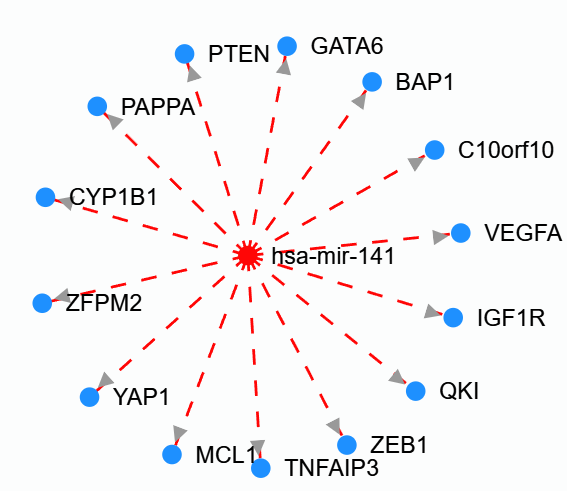

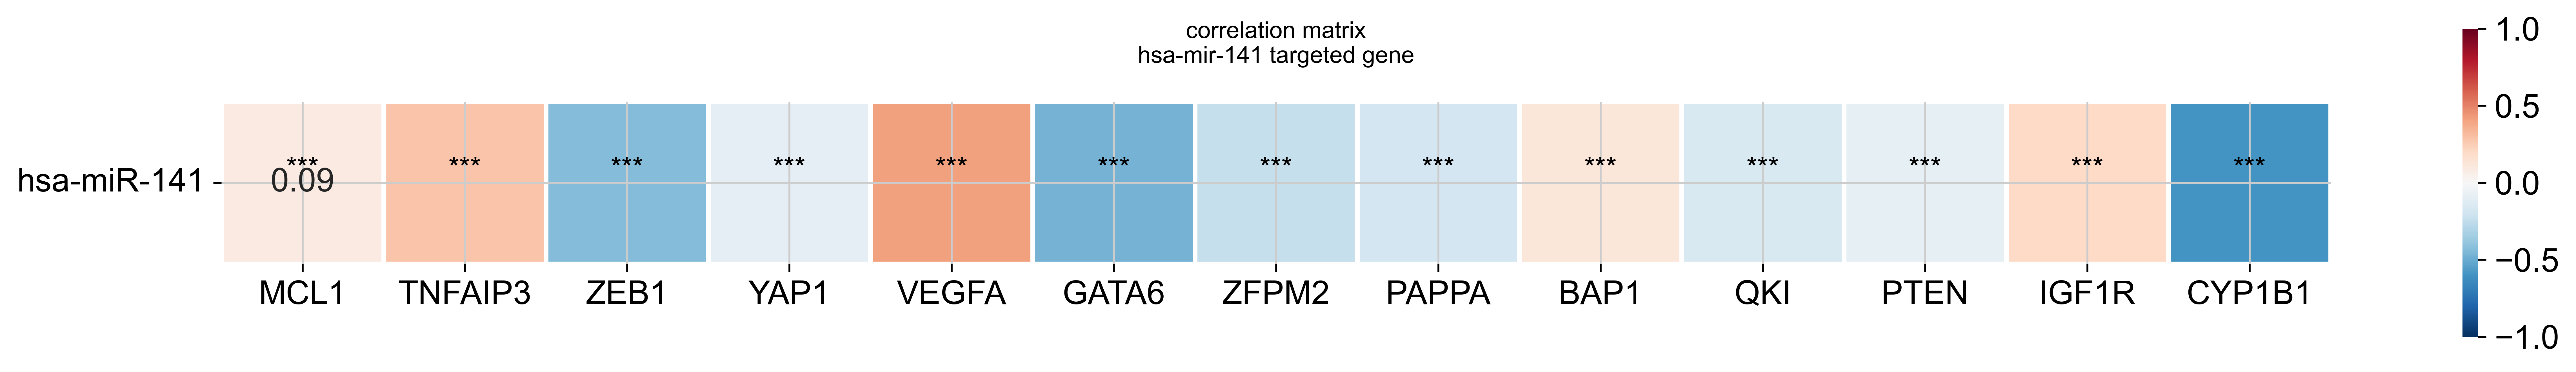

In [14]:
# target141 = ['MCL1','TNFAIP3','ZEB1','YAP1','VEGFA','GATA6','ZFPM2','PAPPA','BAP1','C10orf10','QKI','PTEN','IGF1R','CYP1B1']
target141 = ['MCL1','TNFAIP3','ZEB1','YAP1','VEGFA','GATA6','ZFPM2','PAPPA','BAP1','QKI','PTEN','IGF1R','CYP1B1']
cor_df = st_mrna[target141].join(st_mirna['hsa-miR-141'])
cor_df.to_csv('./data/ovarian_cor/141_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/141_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-141')
# cor_df

In [15]:
# sc.pl.spatial(adata,img_key="hires", color=target141)
# sc.pl.spatial(sp_mirna,img_key="hires", color='hsa-miR-141')

### hsa-miR-200a
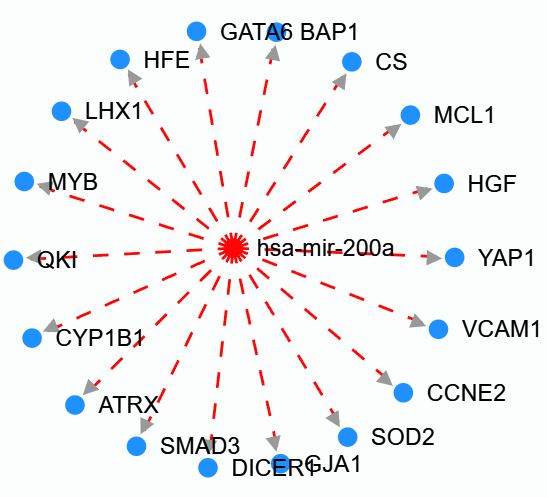

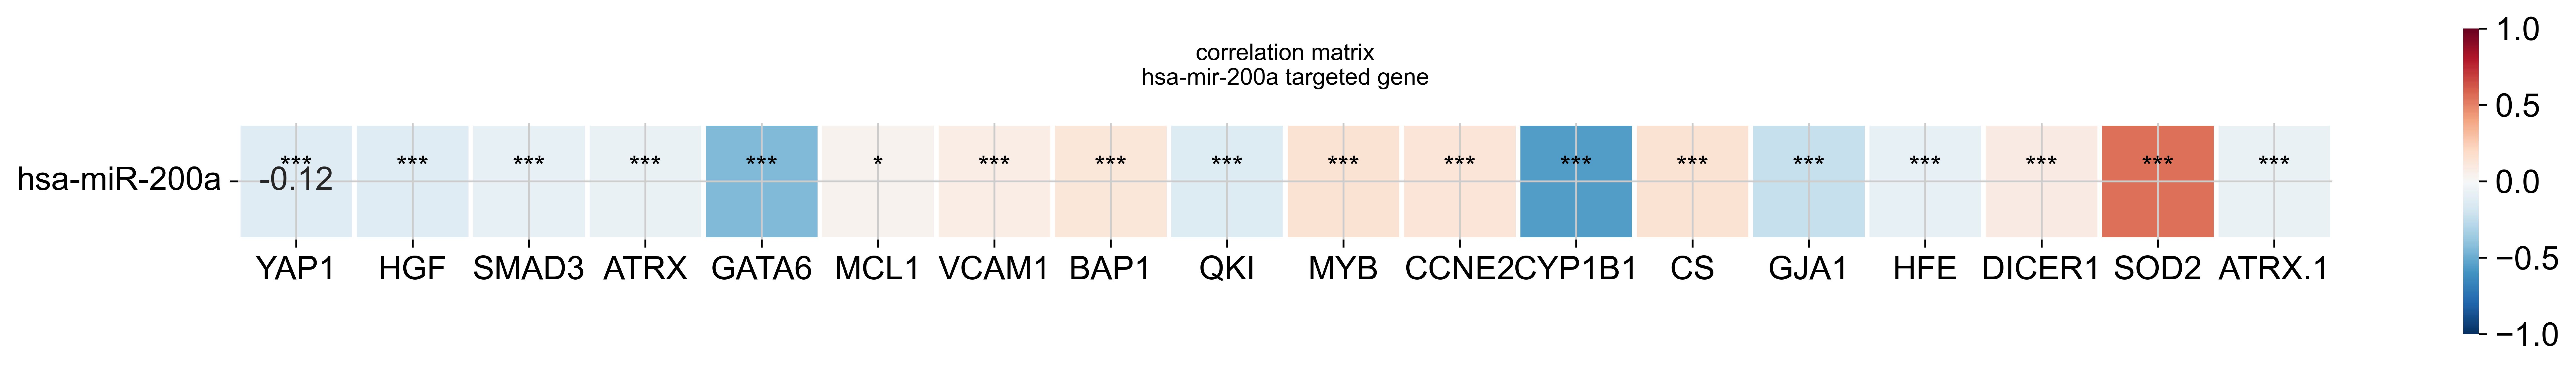

In [16]:
# target200a = ['YAP1','HGF','SMAD3','ATRX','GATA6','MCL1','VCAM1','BAP1','QKI','MYB','CCNE2','CYP1B1','CS','GJA1','HFE','DICER1','SOD2','ATRX','LHX1']
target200a = ['YAP1','HGF','SMAD3','ATRX','GATA6','MCL1','VCAM1','BAP1','QKI','MYB','CCNE2','CYP1B1','CS','GJA1','HFE','DICER1','SOD2','ATRX']

cor_df = st_mrna[target200a].join(st_mirna['hsa-miR-200a'])
cor_df.to_csv('./data/ovarian_cor/200a_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/200a_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-200a')
# cor_df

In [33]:
# sc.pl.spatial(adata,img_key="hires", color=target200a)
# sc.pl.spatial(sp_mirna,img_key="hires", color='hsa-miR-200a')

### hsa-miR-200b
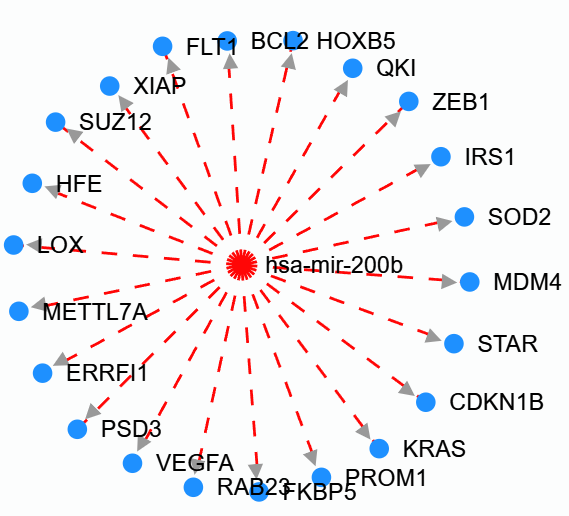

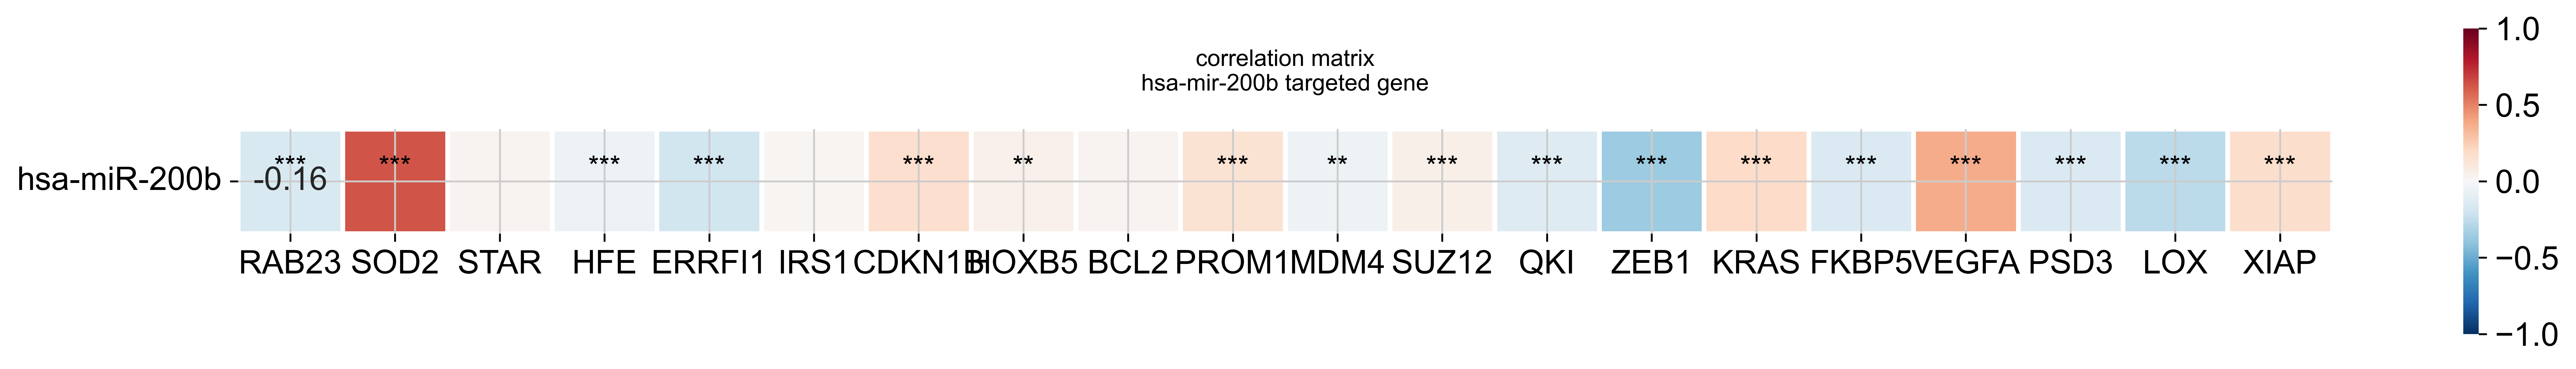

In [18]:
# target200b = ['RAB23','SOD2','STAR','HFE','ERRFI1','IRS1','CDKN1B','HOXB5','BCL2','PROM1','MDM4','SUZ12','QKI','ZEB1','KRAS','FKBP5','VEGFA','PSD3','LOX','XIAP','METTL7A','FLT1']
target200b = ['RAB23','SOD2','STAR','HFE','ERRFI1','IRS1','CDKN1B','HOXB5','BCL2','PROM1','MDM4','SUZ12','QKI','ZEB1','KRAS','FKBP5','VEGFA','PSD3','LOX','XIAP']

st_mrna[target200b]
cor_df = st_mrna[target200b].join(st_mirna['hsa-miR-200b'])
cor_df.to_csv('./data/ovarian_cor/200b_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/200b_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-200b')
# cor_df

In [22]:
# sc.pl.spatial(adata,img_key="hires", color=target200b)
# sc.pl.spatial(sp_mirna,img_key="hires", color='hsa-miR-200b')

### hsa-miR-135b
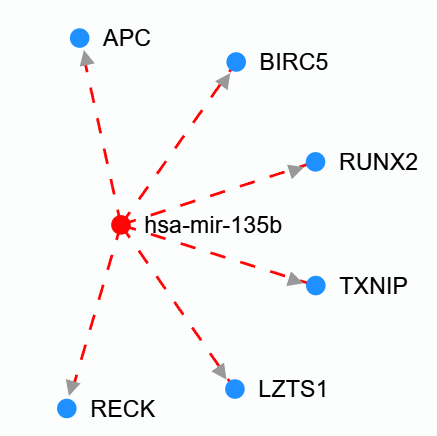

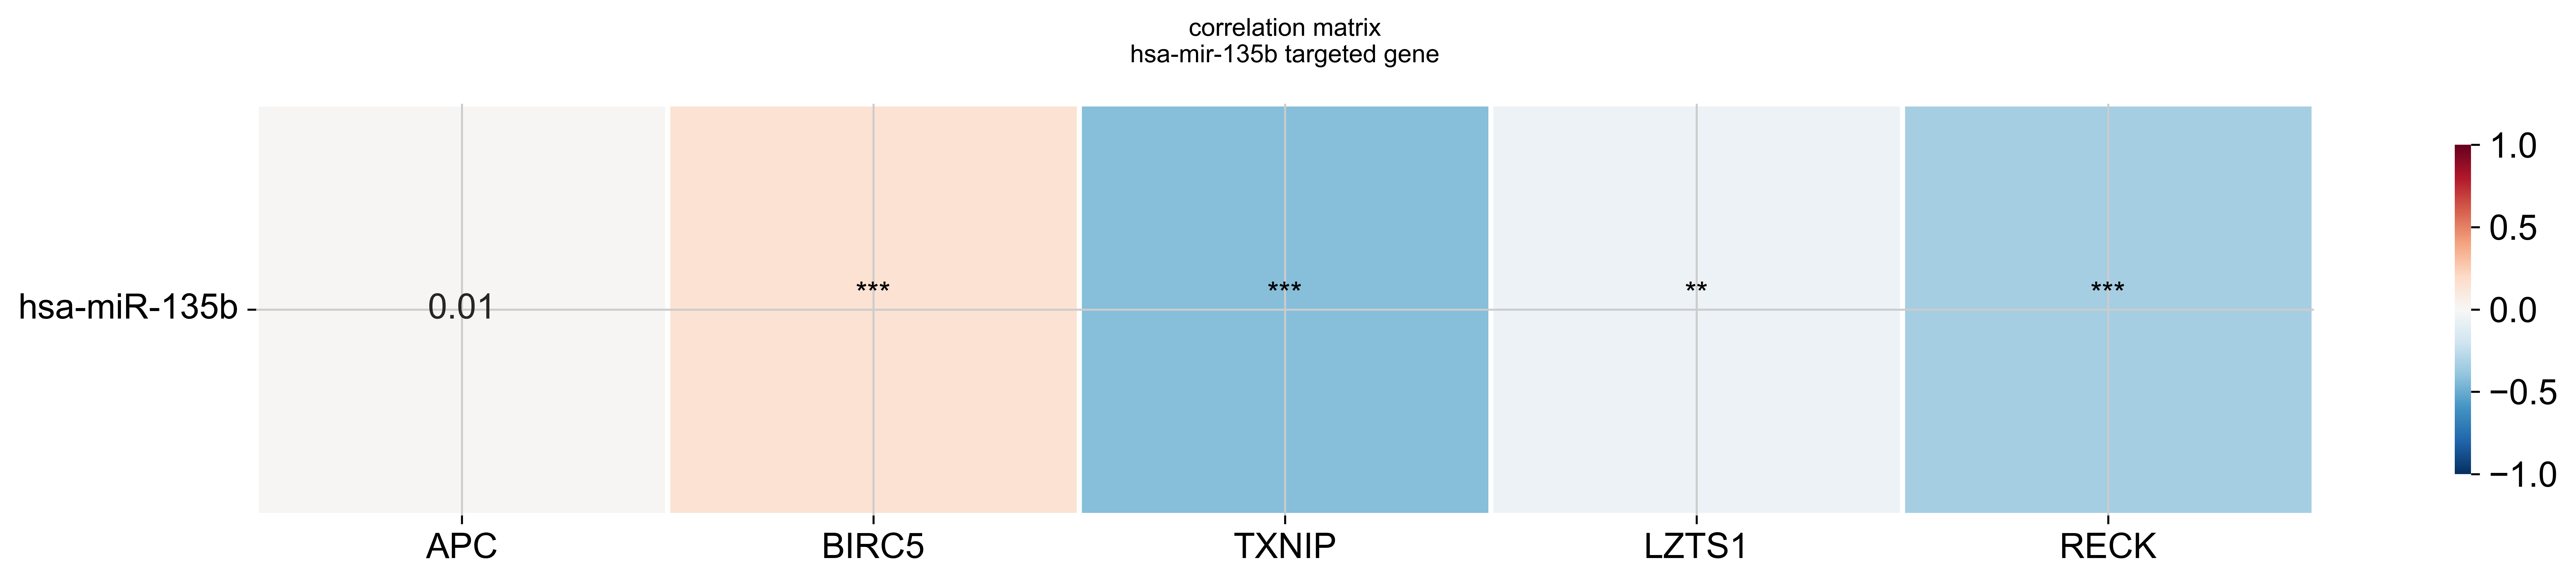

In [20]:
# target135b = ['APC','BIRC5','RUNX2','TXNIP','LZTS1','RECK']
target135b = ['APC','BIRC5','TXNIP','LZTS1','RECK']

cor_df = st_mrna[target135b].join(st_mirna['hsa-miR-135b'])
cor_df.to_csv('./data/ovarian_cor/135b_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/135b_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-135b')
# cor_df

### hsa-miR-200c
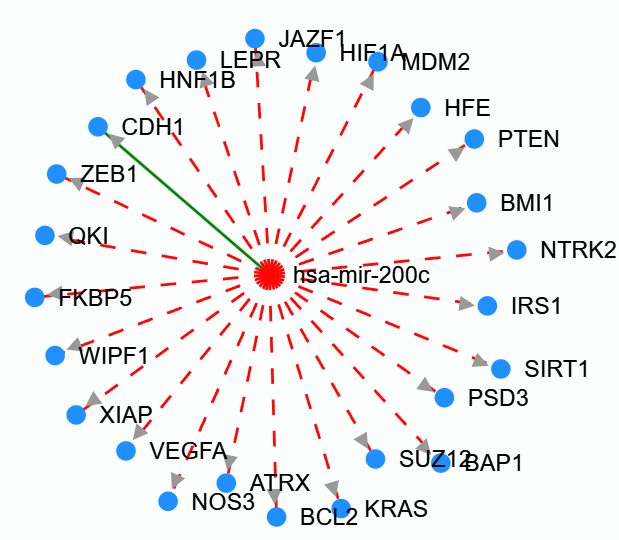

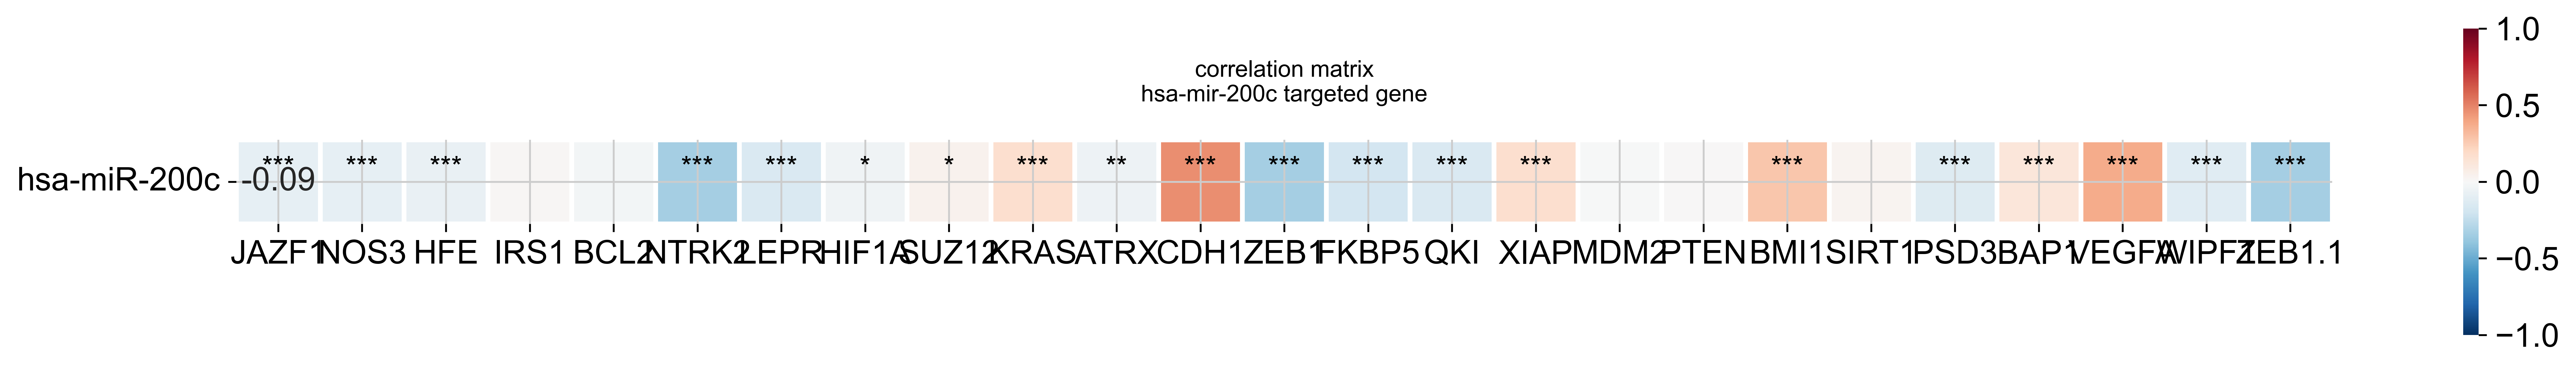

In [23]:
# target200c = ['JAZF1','NOS3','HFE','IRS1','BCL2','NTRK2','LEPR','HIF1A','SUZ12','KRAS','ATRX','CDH1','ZEB1','FKBP5','QKI','XIAP','MDM2','PTEN','BMI1','SIRT1',
# 'PSD3','BAP1','VEGFA','WIPF1','ZEB1','HNF1B']
target200c = ['JAZF1','NOS3','HFE','IRS1','BCL2','NTRK2','LEPR','HIF1A','SUZ12','KRAS','ATRX','CDH1','ZEB1','FKBP5','QKI','XIAP','MDM2','PTEN','BMI1','SIRT1',
'PSD3','BAP1','VEGFA','WIPF1','ZEB1']

cor_df = st_mrna[target200c].join(st_mirna['hsa-miR-200c'])
cor_df.to_csv('./data/ovarian_cor/200c_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/200c_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-200c')
# cor_df

In [ ]:
# sc.pl.spatial(adata,img_key="hires", color=target200c)
# sc.pl.spatial(sp_mirna,img_key="hires", color='hsa-miR-200c')

### hsa-mir-98
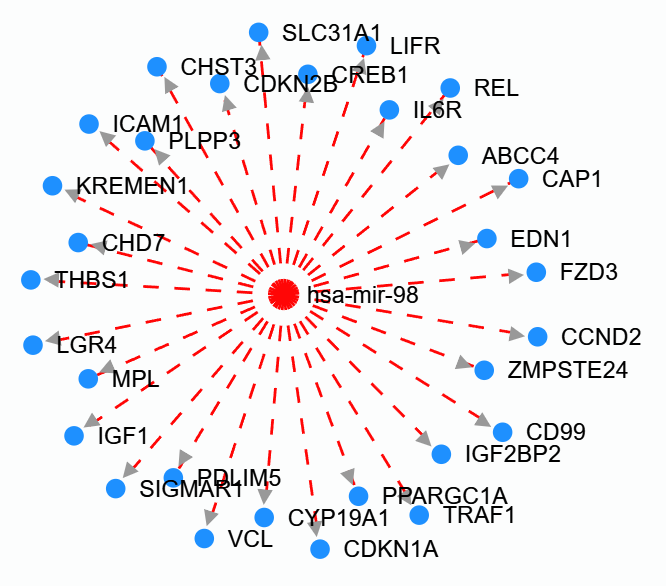

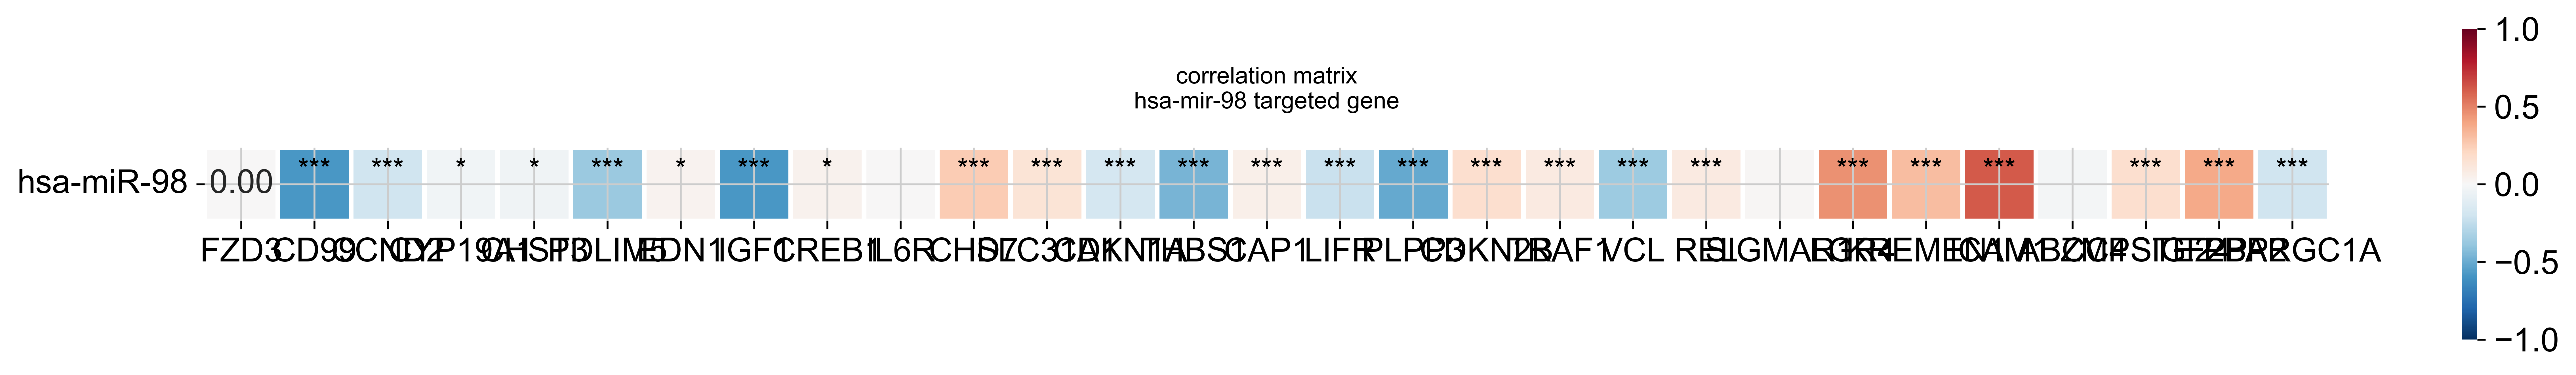

In [26]:
# target98 = ['FZD3','CD99','CCND2','CYP19A1','CHST3','PDLIM5','EDN1','IGF1','CREB1','IL6R','CHD7',
# 'SLC31A1','CDKN1A','THBS1','CAP1','LIFR','PLPP3','CDKN2B','TRAF1','VCL','REL','SIGMAR1','MPL','LGR4',
# 'KREMEN1','ICAM1','ABCC4','ZMPSTE24','IGF2BP2','PPARGC1A']
target98 = ['FZD3','CD99','CCND2','CYP19A1','CHST3','PDLIM5','EDN1','IGF1','CREB1','IL6R','CHD7',
'SLC31A1','CDKN1A','THBS1','CAP1','LIFR','PLPP3','CDKN2B','TRAF1','VCL','REL','SIGMAR1','LGR4',
'KREMEN1','ICAM1','ABCC4','ZMPSTE24','IGF2BP2','PPARGC1A']

cor_df = st_mrna[target98].join(st_mirna['hsa-miR-98'])
cor_df.to_csv('./data/ovarian_cor/98_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/98_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-98')
# cor_df

### hsa-mir-1277(无) hsa-mir-520c
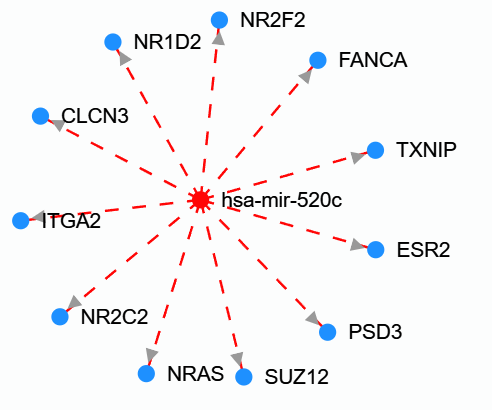

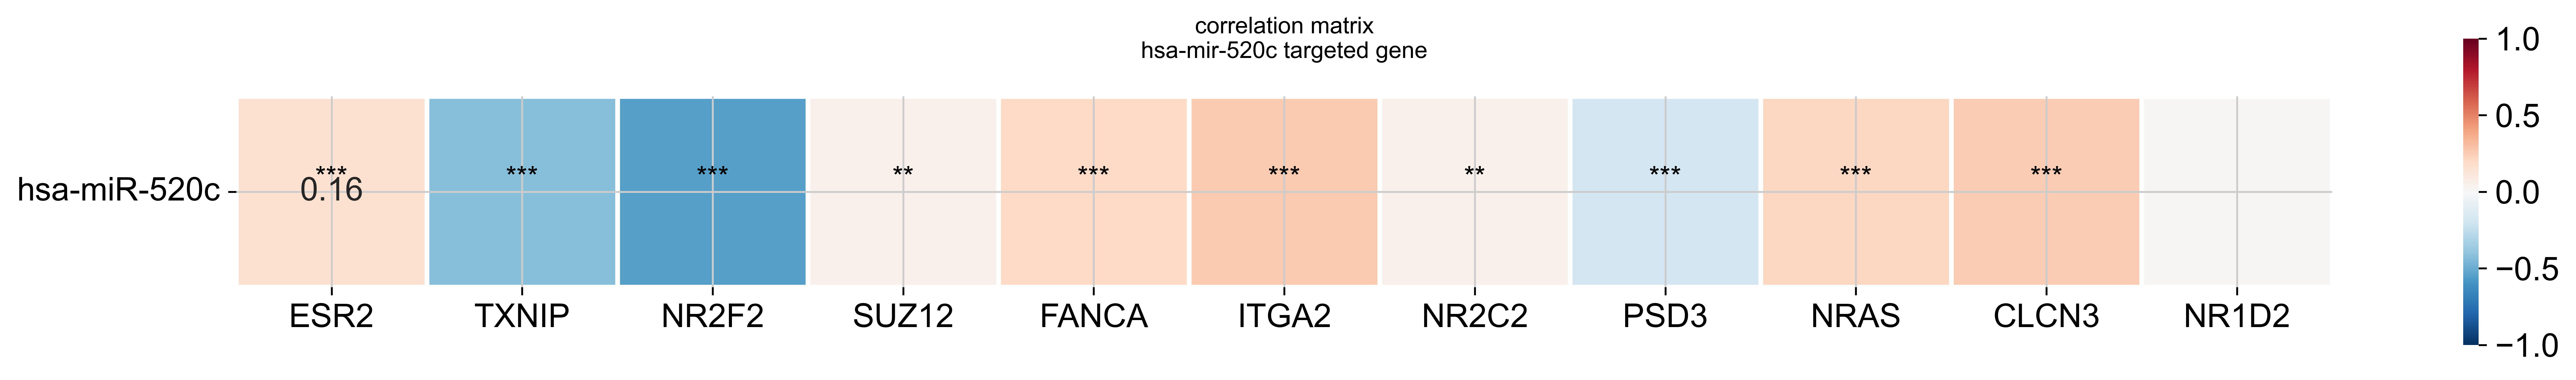

In [27]:
target520c = ['ESR2','TXNIP','NR2F2','SUZ12','FANCA','ITGA2','NR2C2','PSD3','NRAS','CLCN3','NR1D2']
cor_df = st_mrna[target520c].join(st_mirna['hsa-miR-520c'])
cor_df.to_csv('./data/ovarian_cor/520c_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/520c_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-520c')

### hsa-mir-130a

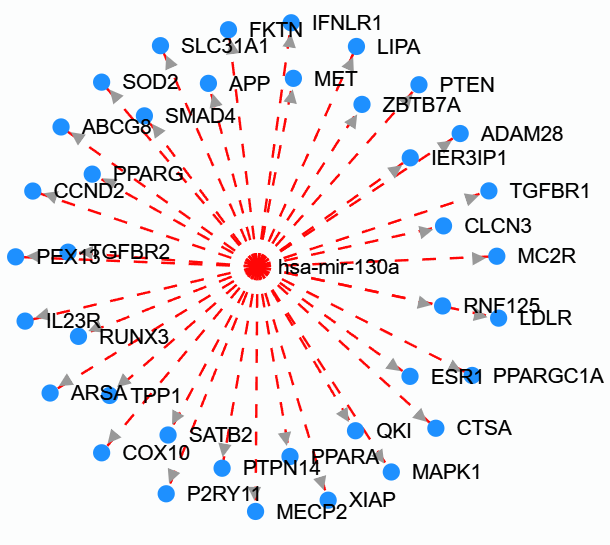

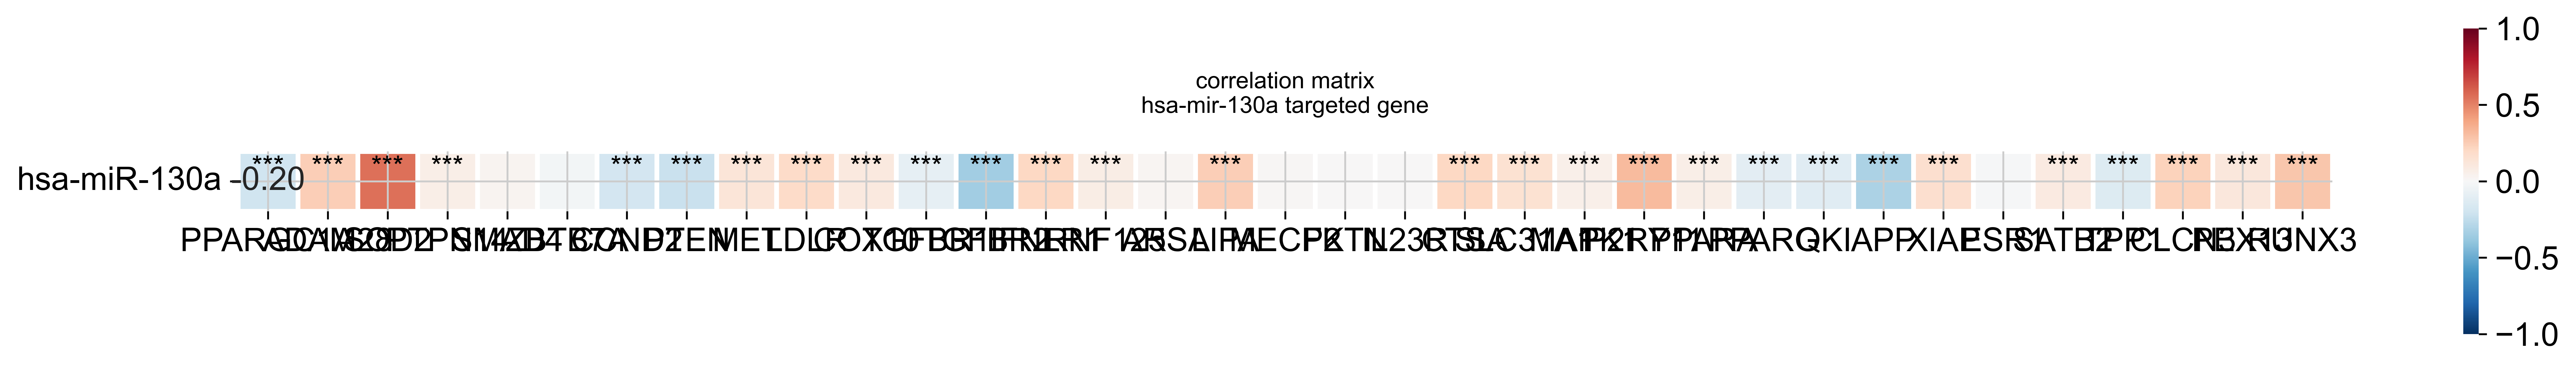

In [31]:
# target130a = ['PPARGC1A','ADAM28','SOD2','PTPN14','SMAD4','ZBTB7A','CCND2','PTEN','MET','ABCG8','LDLR','COX10','TGFBR1','TGFBR2','IFNLR1','RNF125',
# 'ARSA','LIPA','MECP2','FKTN','IL23R','CTSA','SLC31A1','MAPK1','P2RY11','PPARA','PPARG','IER3IP1','QKI','APP','XIAP','MC2R','ESR1','SATB2','TPP1',
# 'CLCN3','PEX13','RUNX3']
target130a = ['PPARGC1A','ADAM28','SOD2','PTPN14','SMAD4','ZBTB7A','CCND2','PTEN','MET','LDLR','COX10','TGFBR1','TGFBR2','IFNLR1','RNF125',
'ARSA','LIPA','MECP2','FKTN','IL23R','CTSA','SLC31A1','MAPK1','P2RY11','PPARA','PPARG','QKI','APP','XIAP','ESR1','SATB2','TPP1',
'CLCN3','PEX13','RUNX3']

cor_df = st_mrna[target130a].join(st_mirna['hsa-miR-130a'])
cor_df.to_csv('./data/ovarian_cor/130a_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/130a_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-130a')

### hsa-mir-708
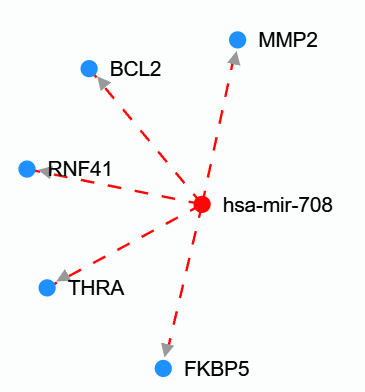

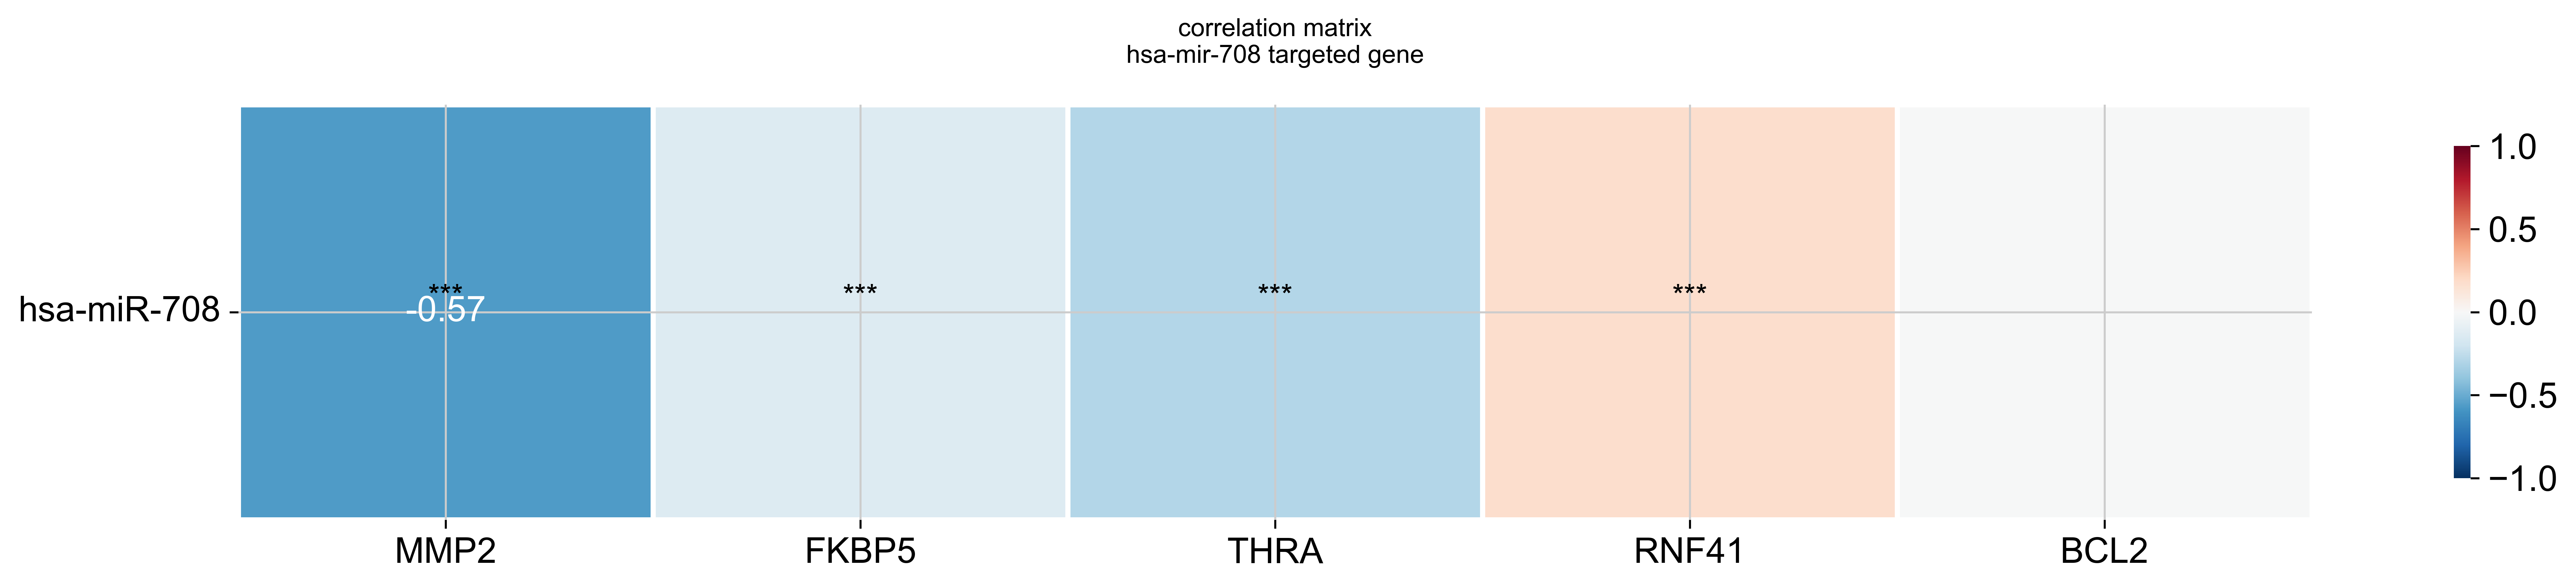

In [35]:
target708 = ['MMP2','FKBP5','THRA','RNF41','BCL2']

cor_df = st_mrna[target708].join(st_mirna['hsa-miR-708'])
cor_df.to_csv('./data/ovarian_cor/708_df.csv')
cor_df = pd.read_csv("./data/ovarian_cor/708_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-708')

## Lung
0    hsa-miR-301b
1    hsa-miR-374a
2     hsa-miR-183
3    hsa-miR-301a
4     hsa-miR-421
5    hsa-miR-130b
6    hsa-miR-200b
7     hsa-miR-15b
8     hsa-miR-708
9     hsa-miR-769

In [3]:
outdir = "./lung_data/"
cancer = "Lung"

reading Spatial Cancer\Lung\CytAssist_FFPE_Human_Lung_Squamous_Cell_Carcinoma_filtered_feature_bc_matrix.h5
 (0:00:00)


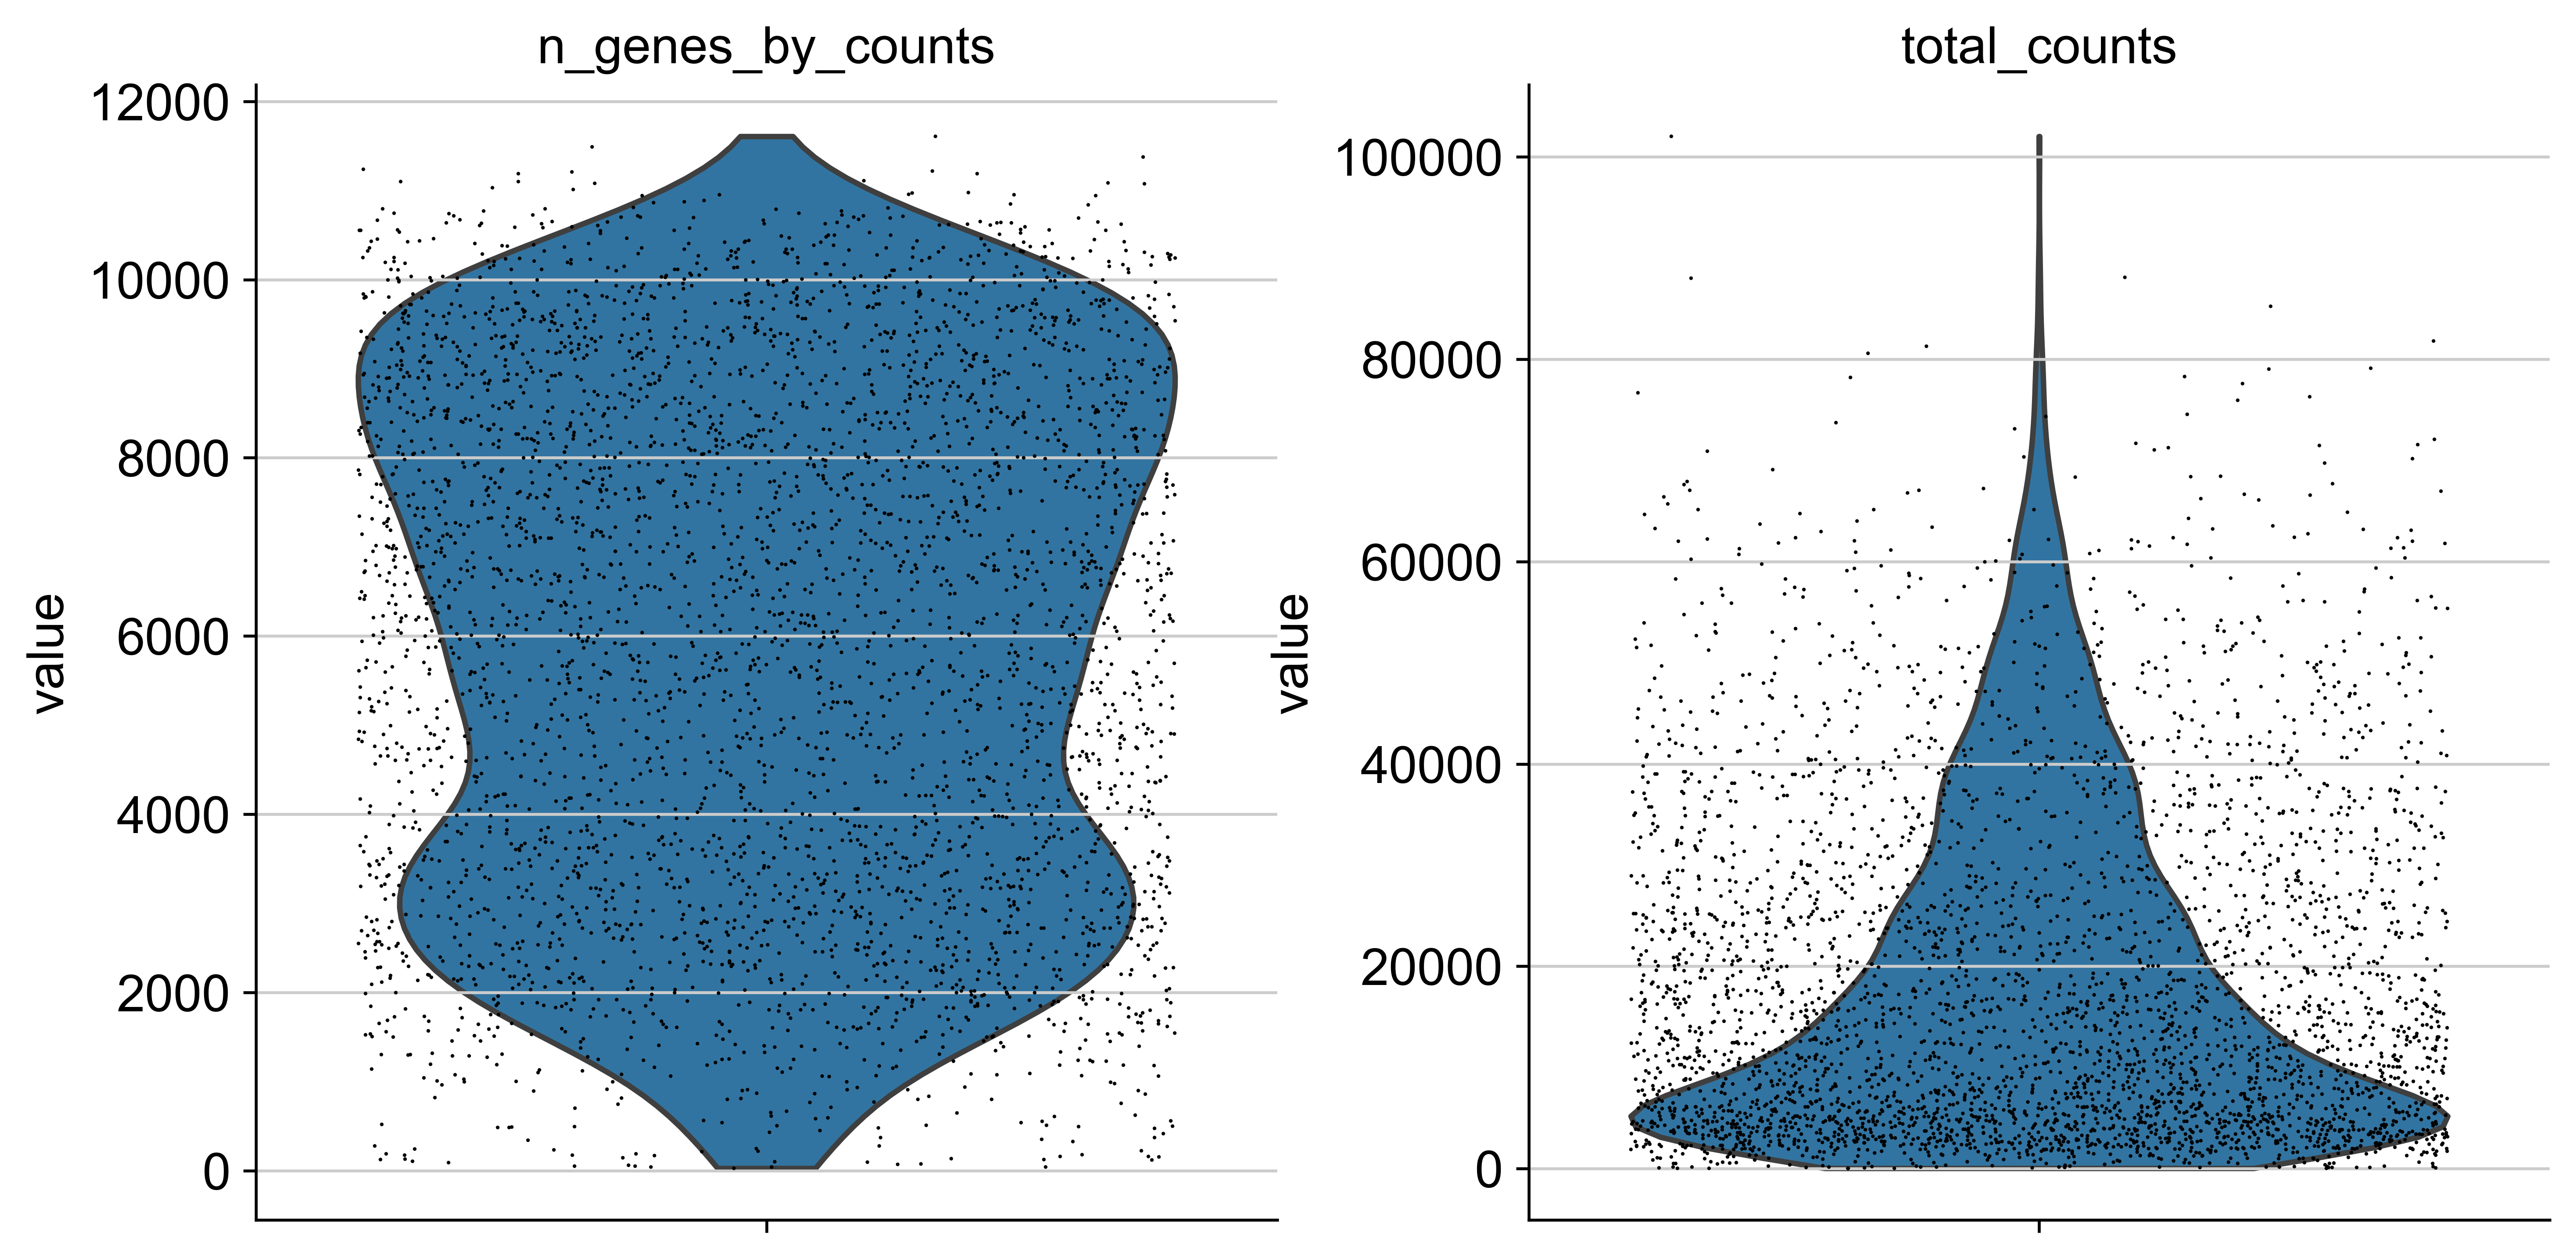

In [13]:
sp_mirna = sc.read_h5ad(outdir+cancer+"_mirna.h5ad")
#读取未处理的原始空转表达数据，里面包含大部分靶基因
adata = sc.read_visium(
    path='./Spatial Cancer/'+cancer+"/",
    library_id=cancer,
    count_file='CytAssist_FFPE_Human_Lung_Squamous_Cell_Carcinoma_filtered_feature_bc_matrix.h5')
adata.obs_names_make_unique()
adata.var_names_make_unique()
# 进行基因计数和添加到 adata.obs 中
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)

In [15]:
def ProcessST(adata,min_counts,max_counts):
    sc.pp.filter_cells(adata, min_counts=min_counts)
    sc.pp.filter_cells(adata, max_counts=max_counts)
    print(f"#cells after MT filter: {adata.n_obs}")
    sc.pp.filter_genes(adata, min_cells=10)
    
   #标准化
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    #归一化
    sc.pp.scale(adata,max_value=10)
    st_mrna = adata.to_df()
    return st_mrna

In [16]:
st_mrna = ProcessST(adata,0,65000)
st_mirna = sp_mirna.to_df()

filtered out 50 cells that have more than 65000 counts
#cells after MT filter: 3808
filtered out 46 genes that are detected in less than 10 cells
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


### hsa-mir-301b
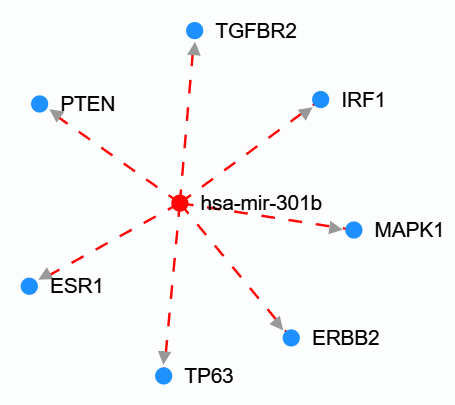

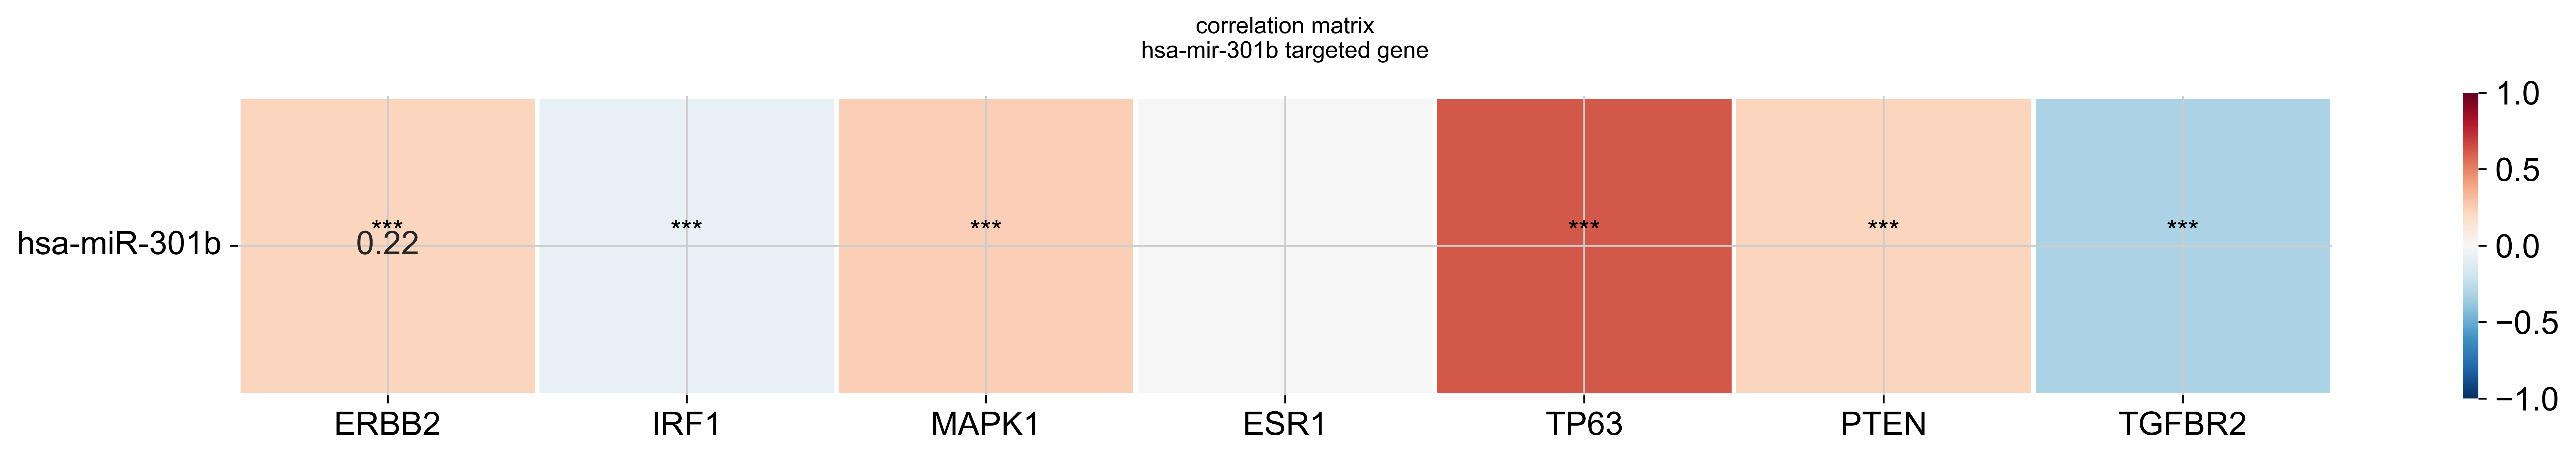

In [18]:
target301b = ['ERBB2','IRF1','MAPK1','ESR1','TP63','PTEN','TGFBR2']
cor_df = st_mrna[target301b].join(st_mirna['hsa-miR-301b'])
cor_df.to_csv(outdir+'cor/301b_df.csv')
cor_df = pd.read_csv(outdir+"cor/301b_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-301b')

### hsa-miR-374a(无)

### hsa-miR-183	
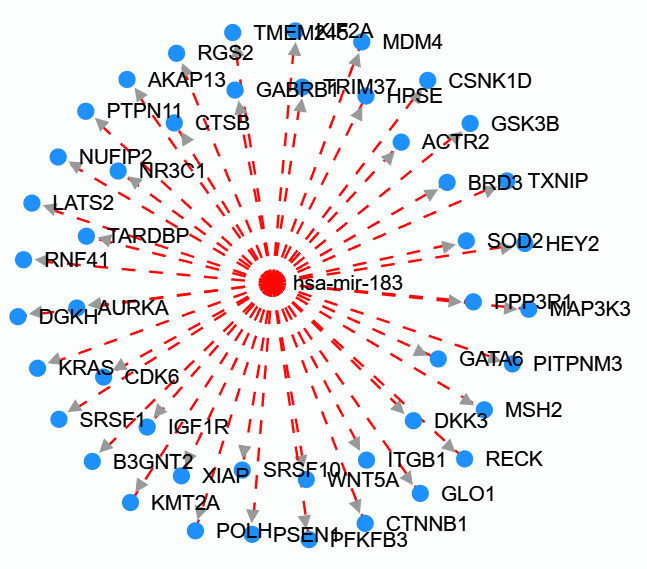

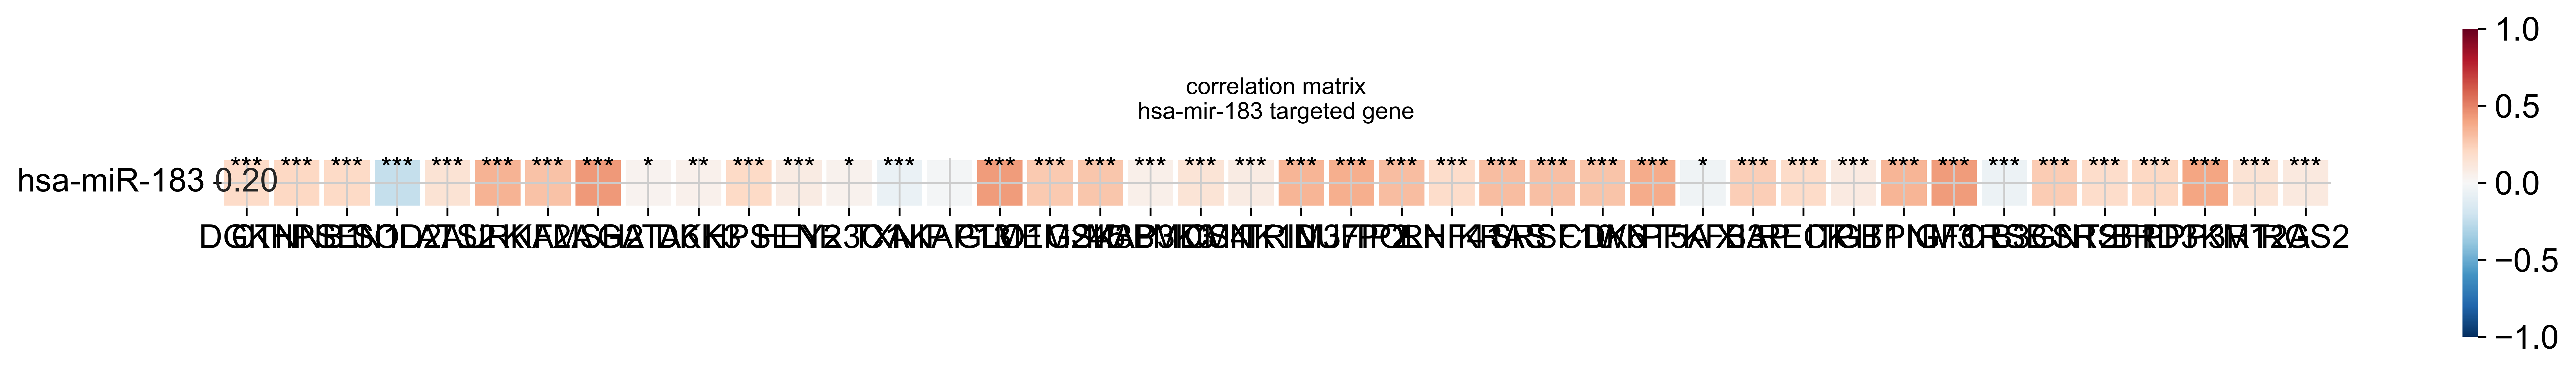

In [19]:
target183 = ['DGKH','CTNNB1','PSEN1','SOD2','LATS2','AURKA','KIF2A','MSH2','GATA6','DKK3','HPSE','HEY2','NR3C1',
'TXNIP','AKAP13','GLO1','TMEM245','GSK3B','MAP3K3','MDM4','CSNK1D','TRIM37','NUFIP2','POLH','RNF41','KRAS','SRSF10','CDK6','WNT5A','PFKFB3',
'XIAP','RECK','ITGB1','PITPNM3','IGF1R','CTSB','B3GNT2','SRSF1','BRD3','PPP3R1','KMT2A','RGS2']
cor_df = st_mrna[target183].join(st_mirna['hsa-miR-183'])
cor_df.to_csv(outdir+'cor/183_df.csv')
cor_df = pd.read_csv(outdir+"cor/183_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-183')

### hsa-miR-301a
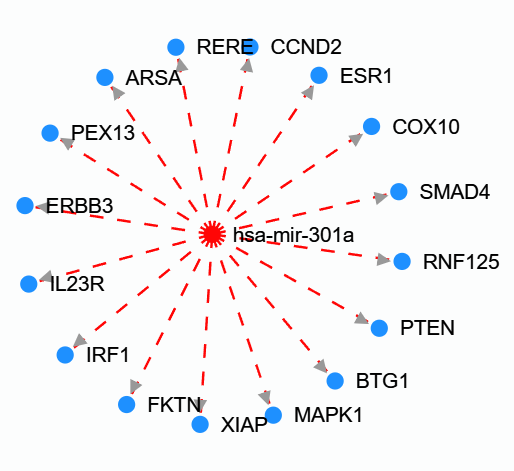

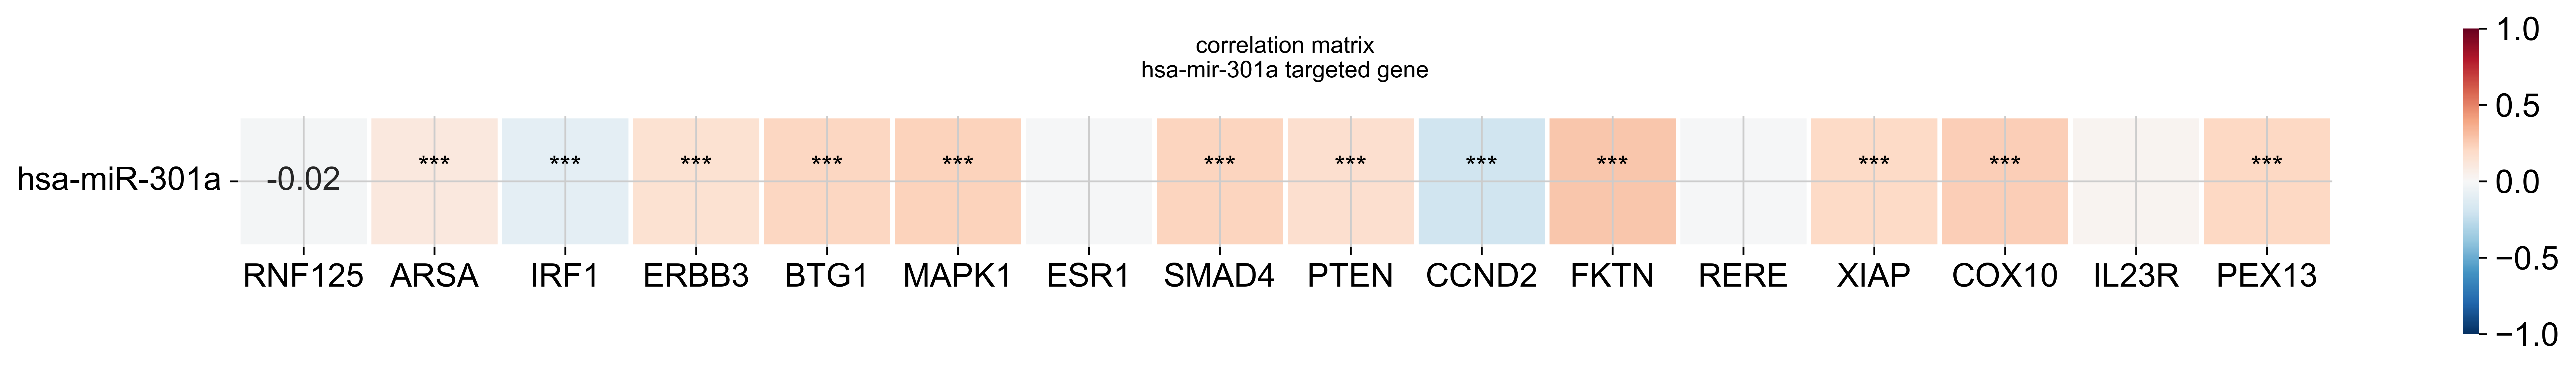

In [20]:
target301a = ['RNF125','ARSA','IRF1','ERBB3','BTG1','MAPK1','ESR1','SMAD4','PTEN','CCND2','FKTN','RERE','XIAP',
'COX10','IL23R','PEX13']
cor_df = st_mrna[target301a].join(st_mirna['hsa-miR-301a'])
cor_df.to_csv(outdir+'cor/301a_df.csv')
cor_df = pd.read_csv(outdir+"cor/301a_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-301a')

### hsa-miR-421（无）

### hsa-miR-130b
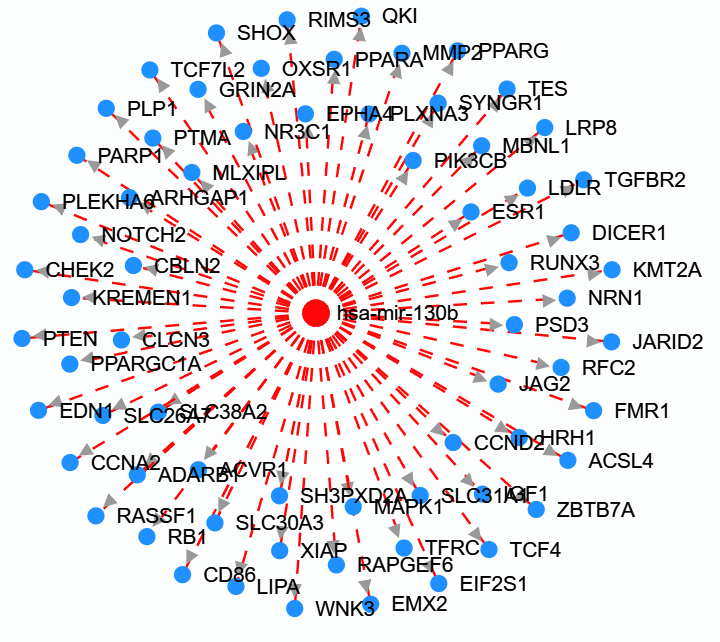

In [23]:
# target130b = ['PIK3CB','ARHGAP1','PTMA','DICER1','PPARGC1A','GRIN2A','PARP1','JAG2','SLC38A2','ADARB1','ZBTB7A','CCND2',
# 'PTEN','JARID2','MLXIPL','SLC30A3','RIMS3','LDLR','TCF7L2','TGFBR2','RB1','NR3C1','MMP2','LIPA','SH3PXD2A','WNK3','EDN1',
# 'HRH1','IGF1','RASSF1','RAPGEF6','SYNGR1','PLXNA3','SLC31A1','FMR1','MBNL1','TFRC','MAPK1','TES','PPARA','PLP1','PPARG',
# 'TCF4','SLC26A7','QKI','XIAP','LRP8','PSD3','EIF2S1','RFC2','CBLN2','CD86','SHOX','ACVR1','NRN1','ESR1','KMT2A','PLEKHA6',
# 'EPHA4','OXSR1','NOTCH2','CCNA2','EMX2','KREMEN1','CLCN3','CHEK2','RUNX3','ACSL4']
target130b = ['PIK3CB','ARHGAP1','DICER1','PPARGC1A','GRIN2A','PARP1','JAG2','SLC38A2','ADARB1','ZBTB7A','CCND2',
'PTEN','JARID2','MLXIPL','SLC30A3','RIMS3','LDLR','TCF7L2','TGFBR2','RB1','NR3C1','MMP2','LIPA','SH3PXD2A','WNK3','EDN1',
'HRH1','IGF1','RASSF1','RAPGEF6','SYNGR1','PLXNA3','SLC31A1','FMR1','MBNL1','TFRC','MAPK1','TES','PPARA','PLP1','PPARG',
'TCF4','SLC26A7','QKI','XIAP','LRP8','PSD3','EIF2S1','RFC2','CBLN2','CD86','SHOX','ACVR1','NRN1','ESR1','KMT2A','PLEKHA6',
'EPHA4','OXSR1','NOTCH2','CCNA2','EMX2','KREMEN1','CLCN3','CHEK2','RUNX3','ACSL4']
cor_df = st_mrna[target130b].join(st_mirna['hsa-miR-130b'])
cor_df.to_csv(outdir+'cor/130b_df.csv')
cor_df = pd.read_csv(outdir+"cor/130b_df.csv",index_col=0)
# plot_heatmap(cor_df,'hsa-mir-130b')

### hsa-miR-200b
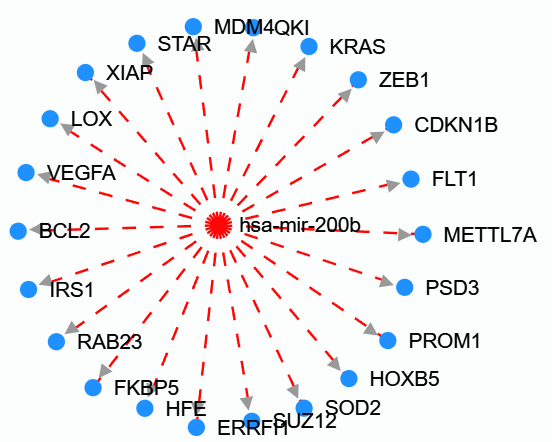

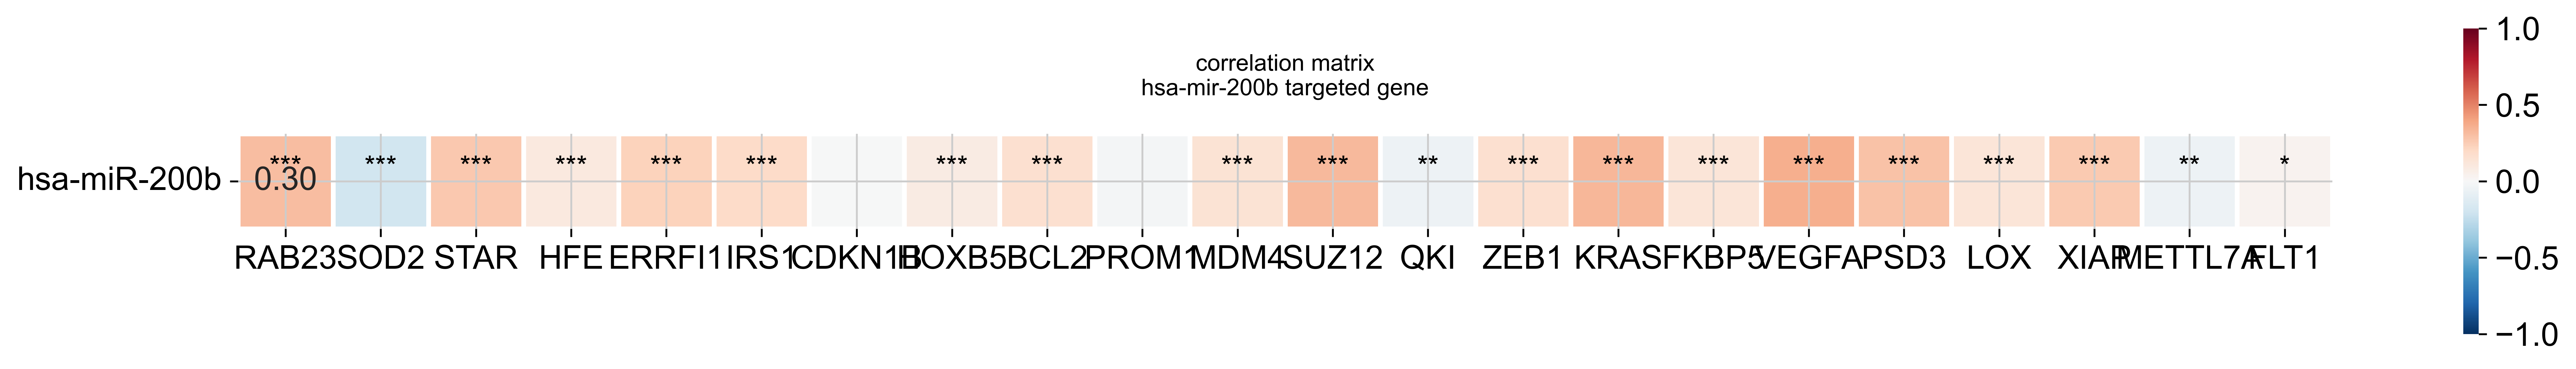

In [24]:
target200b = ['RAB23','SOD2','STAR','HFE','ERRFI1','IRS1','CDKN1B','HOXB5','BCL2','PROM1','MDM4','SUZ12','QKI','ZEB1','KRAS','FKBP5','VEGFA','PSD3','LOX','XIAP','METTL7A','FLT1']

st_mrna[target200b]
cor_df = st_mrna[target200b].join(st_mirna['hsa-miR-200b'])
cor_df.to_csv(outdir+'cor/200b_df.csv')
cor_df = pd.read_csv(outdir+"/cor/200b_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-200b')

### hsa-miR-15b
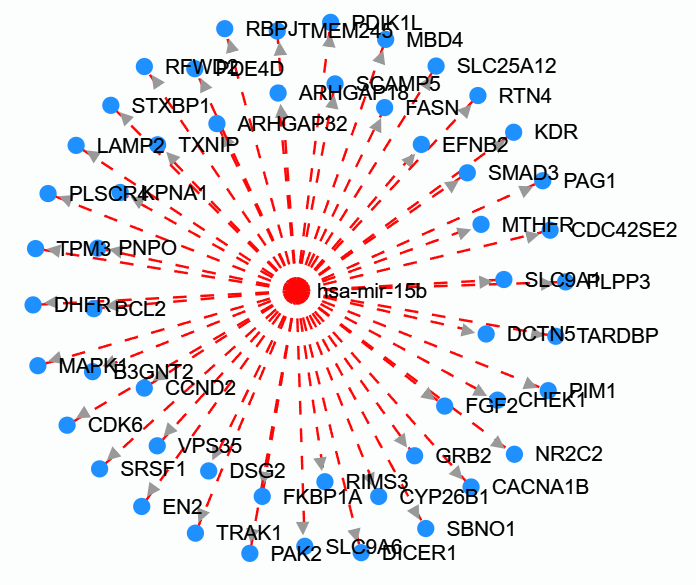

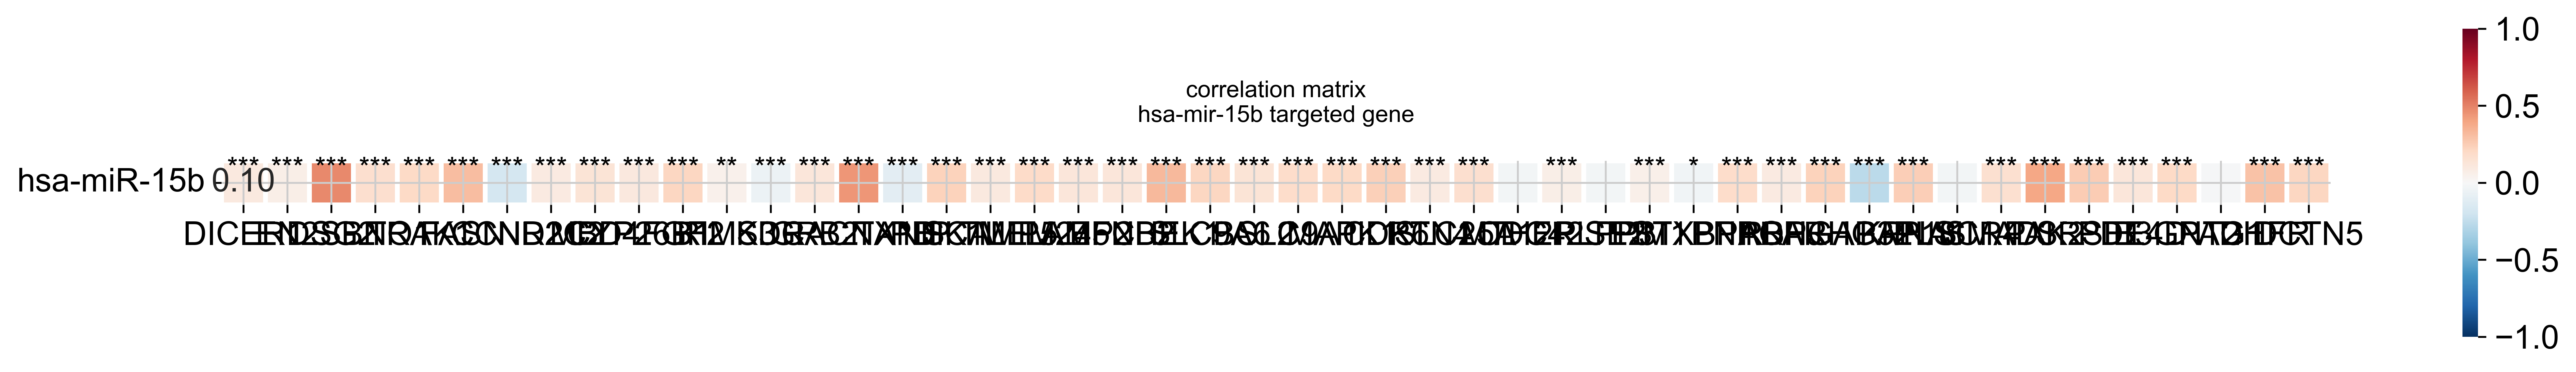

In [26]:
# target15b = ['DICER1','EN2','DSG2','SBNO1','TRAK1','FASN','FKBP1A','CCND2','NR2C2','MBD4','TARDBP','CYP26B1','FGF2','RIMS3',
# 'KDR','GRB2','CACNA1B','TXNIP','PDIK1L','SCAMP5','TMEM245','LAMP2','EFNB2','CHEK1','SLC9A6','BCL2','SLC9A1','VPS35','MAPK1',
# 'CDK6','RTN4','SLC25A12','MTHFR','CDC42SE2','PLPP3','PIM1','STXBP1','RFWD2','PNPO','RBPJ','ARHGAP32','ARHGAP18','KPNA1','PLSCR4',
# 'SMAD3','PAK2','TPM3','SRSF1','PDE4D','B3GNT2','PAG1','DHFR','DCTN5']
target15b = ['DICER1','EN2','DSG2','SBNO1','TRAK1','FASN','CCND2','NR2C2','MBD4','CYP26B1','FGF2','RIMS3',
'KDR','GRB2','CACNA1B','TXNIP','PDIK1L','SCAMP5','TMEM245','LAMP2','EFNB2','CHEK1','SLC9A6','BCL2','SLC9A1','MAPK1',
'CDK6','RTN4','SLC25A12','MTHFR','CDC42SE2','PLPP3','PIM1','STXBP1','PNPO','RBPJ','ARHGAP32','ARHGAP18','KPNA1','PLSCR4',
'SMAD3','PAK2','SRSF1','PDE4D','B3GNT2','PAG1','DHFR','DCTN5']
st_mrna[target15b]
cor_df = st_mrna[target15b].join(st_mirna['hsa-miR-15b'])
cor_df.to_csv(outdir+'cor/15b_df.csv')
cor_df = pd.read_csv(outdir+"/cor/15b_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-15b')

### hsa-miR-708
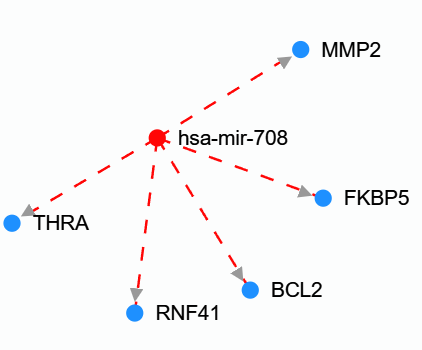

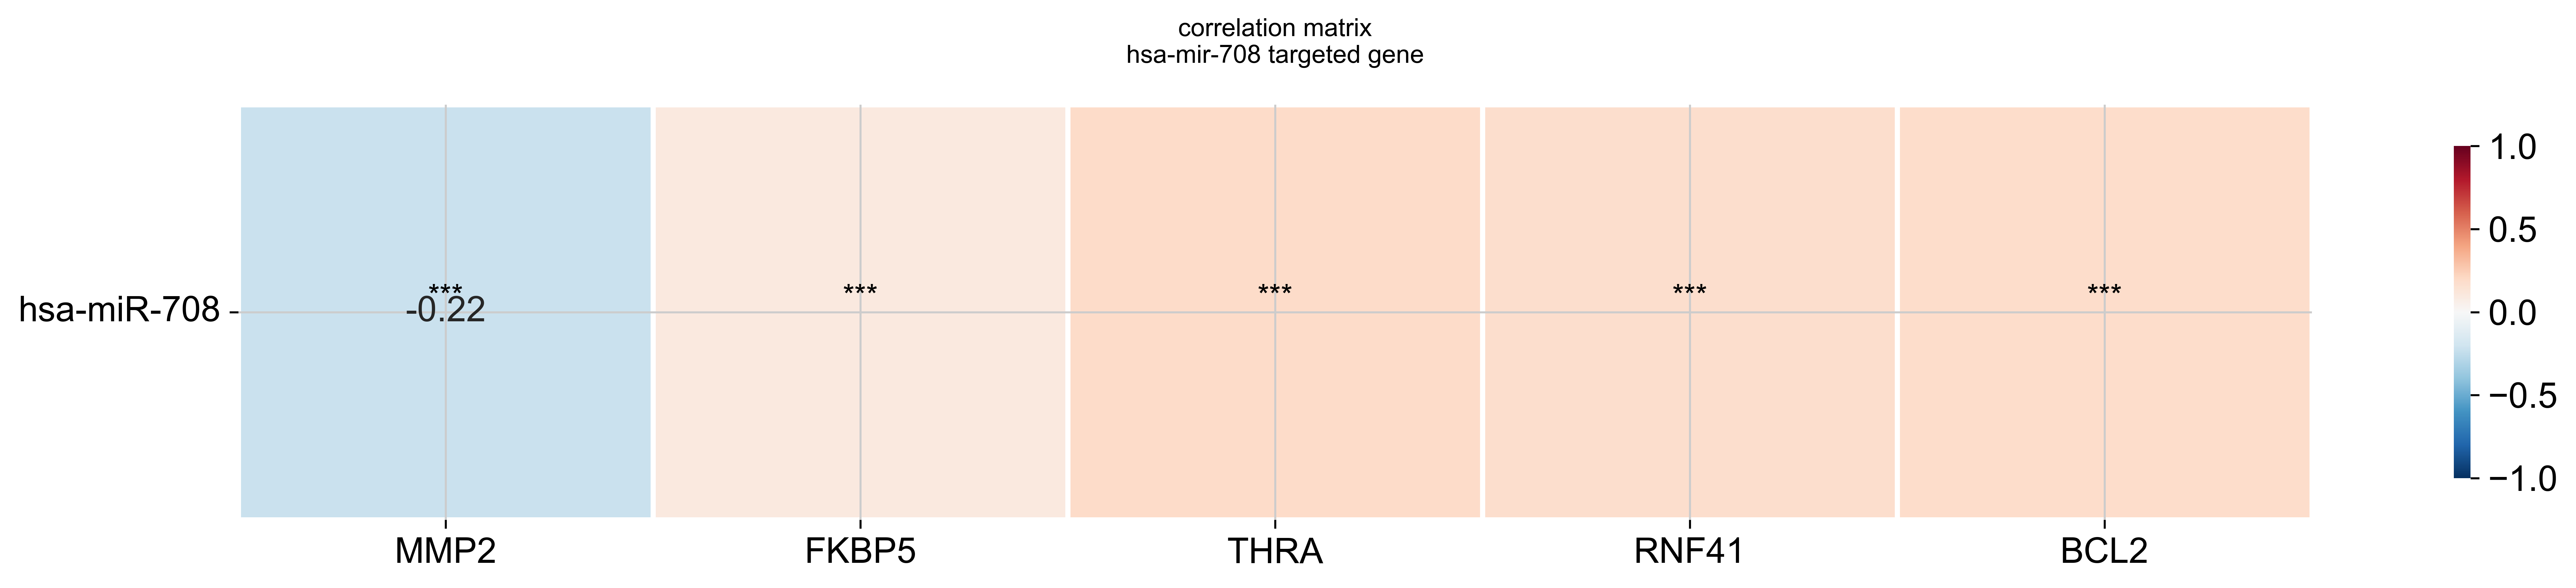

In [27]:
target708 = ['MMP2','FKBP5','THRA','RNF41','BCL2']
st_mrna[target708]
cor_df = st_mrna[target708].join(st_mirna['hsa-miR-708'])
cor_df.to_csv(outdir+'cor/708_df.csv')
cor_df = pd.read_csv(outdir+"/cor/708_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-708')

### hsa-miR-769
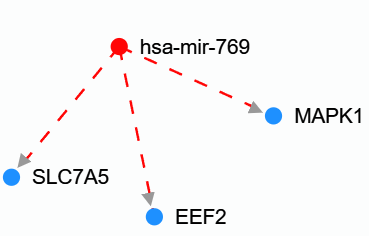

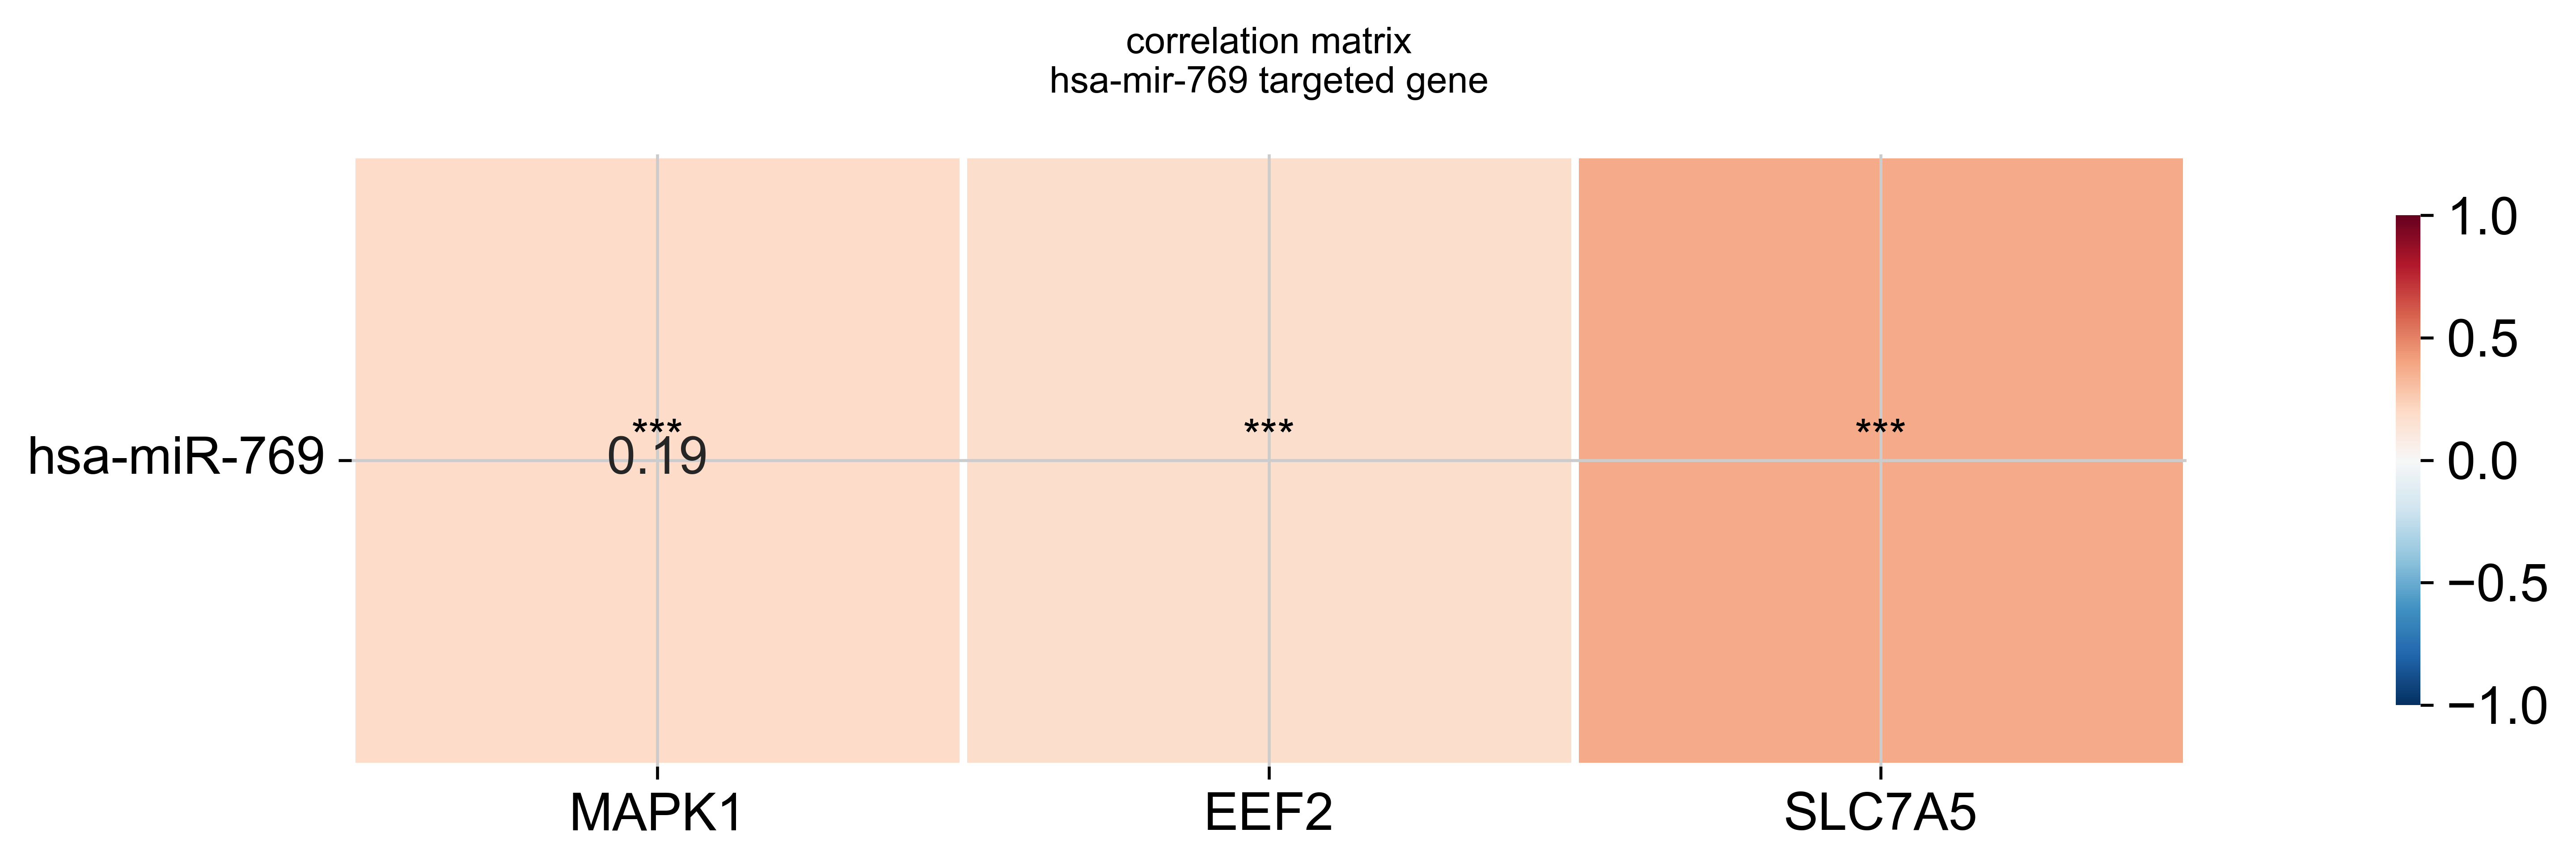

In [28]:
target769 = ['MAPK1','EEF2','SLC7A5']
st_mrna[target769]
cor_df = st_mrna[target769].join(st_mirna['hsa-miR-769'])
cor_df.to_csv(outdir+'cor/769_df.csv')
cor_df = pd.read_csv(outdir+"/cor/769_df.csv",index_col=0)
plot_heatmap(cor_df,'hsa-mir-769')